In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('/home/zhouzb/')
import illustris_python as il

def HistValAndBin(nums, bins, more=0, mask=0):
    if mask == 1:
        reMask = []

    val = []
    tmp = nums[nums < bins[1]]
    if mask == 1:
        reMask.append(nums < bins[1])
    val.append(len(tmp))

    for i in range(1,len(bins)-1):
        tmp = nums[(nums > bins[i]) & (nums <= bins[i+1])]
        val.append(len(tmp))
        if mask == 1:
            reMask.append((nums > bins[i]) & (nums <= bins[i+1]))

    if more == 1:
        tmp = nums[nums > bins[-1]]
        val.append(len(tmp))
        if mask == 1:
            reMask.append(nums > bins[-1])

    if mask == 0:
        return np.array(val)
    else:
        return np.array(val), np.array(reMask)

def LoadMergHist(simu, subhaloID):
    '''
    return subhalo's main progenitor and merger history with snapshot
    '''
    if simu == 'TNG':
        ldir = '/Raid0/zhouzb/localRUN/tng_DiskMerTree/%d.json' % subhaloID
    else:
        ldir = '/Raid0/zhouzb/localRUN/il1_DiskMerTree/%d.json' % subhaloID
    
    with open(ldir) as f:
        data = json.load(f)
    
    Main = np.array(data['Main'])
    return dict(zip(Main[:, 0], Main[:, 1])), np.array(data['Mergers'])

def ErrorBarMedian(data):
    #return 25%, 50%, 75%
    if len(data) == 0:
        return 0, 0, 0
    elif len(data) < 3:
        return 0, np.median(data), 0
    else:
        data.sort()
        return data[int(len(data) / 4)], np.median(data), data[int(len(data) * 0.75)]


In [2]:
#TNG data
barID = np.load('/Raid0/zhouzb/localRUN/barredID_4WP_TNG.npy')
diskID = np.load('/Raid0/zhouzb/localRUN/diskID_4WP.npy')
#Gas Fraction Gf
mas = il.func.loadSubhalos('TNG', 99, 'SubhaloMassInRadType')
Gf = mas[:, 0] / (mas[:, 4] + mas[:, 0])
Gf[np.isnan(Gf)] = 0
#Stellar Particles
SP = il.func.loadSubhalos('TNG', 99, 'SubhaloLenType')[:, 4]
#Stellar Mass
ms = il.func.loadSubhalos('TNG', 99, 'SubhaloMassType') / 0.6774
sMass = ms[:, 4]
sMass = np.log10(sMass * 10 ** 10)
sMass[np.isinf(sMass)] = 0
#Baryon Mass
baryonMass = ms[:, 0] + ms[:, 4]
baryonMass = np.log10(baryonMass * 10 ** 10)
baryonMass[np.isinf(baryonMass)] = 0
#Total mass
ttMass = ms.sum(1)
ttMass = np.log10(ttMass * 10 ** 10)
ttMass[np.isinf(ttMass)] = 0

/home/zhouzb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/home/zhouzb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/zhouzb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


In [3]:

#Illsutris-1 data
il1_barID = np.load('/Raid0/zhouzb/localRUN/barredID_il1.npy')
il1_diskID = np.load('/Raid0/zhouzb/localRUN/diskID_il1.npy')
il1_mas = il.func.loadSubhalos('il1', 135, 'SubhaloMassInRadType')
#Gas Fraction
il1_gf = il1_mas[:, 0] / (il1_mas[:, 4] + il1_mas[:, 0])
il1_gf[np.isnan(il1_gf)] = 0
#Stellar Particles
il1_SP = il.func.loadSubhalos('il1', 135, 'SubhaloLenType')[:, 4]
#Stellar Mass
ms = il.func.loadSubhalos('il1', 135, 'SubhaloMassType') / 0.704
il1_sMass = ms[:, 4]
il1_sMass = np.log10(il1_sMass * 10 ** 10)
il1_sMass[np.isinf(il1_sMass)] = 0
#Baryon Mass
il1_baryonMass = ms[:, 0] + ms[:, 4]
il1_baryonMass = np.log10(il1_baryonMass * 10 ** 10)
il1_baryonMass[np.isinf(il1_baryonMass)] = 0
#Total mass
il1_ttMass = ms.sum(1)
il1_ttMass = np.log10(il1_ttMass * 10 ** 10)
il1_ttMass[np.isinf(il1_ttMass)] = 0

/home/zhouzb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/zhouzb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/home/zhouzb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


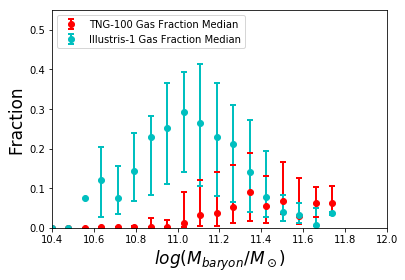

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r'$log(M_{baryon}/M_\odot)$', fontsize=17)
ax.set_xlim(10.4, 12)
ax.set_ylabel('Fraction', fontsize=17)
ax.set_ylim(0, 0.55)

bins = np.linspace(10.2, 11.7, 20)
n1, m1 = HistValAndBin(baryonMass[diskID], bins, more=1, mask=1)
n2, m2 = HistValAndBin(baryonMass[barID], bins, more=1, mask=1)

nn1, mm1 = HistValAndBin(il1_baryonMass[il1_diskID], bins, more=1, mask=1)
nn2, mm2 = HistValAndBin(il1_baryonMass[il1_barID], bins, more=1, mask=1)

#TNG GasFraction ErrorBar
Dgas = Gf[diskID]
data = [[], [], []]
mean = []
for i in m1:
    mean.append(np.mean(Dgas[i]))
    d0, d1, d2 = ErrorBarMedian(Dgas[i])
    data[0].append(d0)
    data[1].append(d1)
    data[2].append(d2)
data = np.array(data)
yerr = np.vstack((data[1,:] - data[0,:], data[2,:] - data[1,:]))
x = bins + (bins[1] - bins[0]) / 2
ax.errorbar(x, data[1,:], yerr=yerr, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='TNG-100 Gas Fraction Median')



#IL1 GasFraction ErrorBar
Dgas = il1_gf[il1_diskID]
data = [[], [], []]
mean = []
for i in mm1:
    mean.append(np.mean(Dgas[i]))
    d0, d1, d2 = ErrorBarMedian(Dgas[i])
    data[0].append(d0)
    data[1].append(d1)
    data[2].append(d2)
data = np.array(data)
yerr = np.vstack((data[1,:] - data[0,:], data[2,:] - data[1,:]))
x = bins + (bins[1] - bins[0]) / 2
ax.errorbar(x, data[1,:], yerr=yerr, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='Illustris-1 Gas Fraction Median')


ax.legend(loc=2)
plt.savefig('/Raid0/zhouzb/result_V2/bayronMassAndGas.pdf')

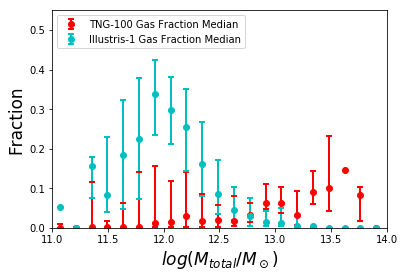

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r'$log(M_{total}/M_\odot)$', fontsize=17)
ax.set_xlim(11, 14)
ax.set_ylabel('Fraction', fontsize=17)
ax.set_ylim(0, 0.55)

bins = np.linspace(11, 14.4, 25)
n1, m1 = HistValAndBin(ttMass[diskID], bins, more=1, mask=1)
n2, m2 = HistValAndBin(ttMass[barID], bins, more=1, mask=1)

nn1, mm1 = HistValAndBin(il1_ttMass[il1_diskID], bins, more=1, mask=1)
nn2, mm2 = HistValAndBin(il1_ttMass[il1_barID], bins, more=1, mask=1)

#TNG GasFraction ErrorBar
Dgas = Gf[diskID]
data = [[], [], []]
mean = []
for i in m1:
    mean.append(np.mean(Dgas[i]))
    d0, d1, d2 = ErrorBarMedian(Dgas[i])
    data[0].append(d0)
    data[1].append(d1)
    data[2].append(d2)
data = np.array(data)
yerr = np.vstack((data[1,:] - data[0,:], data[2,:] - data[1,:]))
x = bins + (bins[1] - bins[0]) / 2
ax.errorbar(x, data[1,:], yerr=yerr, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='TNG-100 Gas Fraction Median')



#IL1 GasFraction ErrorBar
Dgas = il1_gf[il1_diskID]
data = [[], [], []]
mean = []
for i in mm1:
    mean.append(np.mean(Dgas[i]))
    d0, d1, d2 = ErrorBarMedian(Dgas[i])
    data[0].append(d0)
    data[1].append(d1)
    data[2].append(d2)
data = np.array(data)
yerr = np.vstack((data[1,:] - data[0,:], data[2,:] - data[1,:]))
x = bins + (bins[1] - bins[0]) / 2
ax.errorbar(x, data[1,:], yerr=yerr, elinewidth=2, capthick=2, capsize=3, color='c', fmt='o', label='Illustris-1 Gas Fraction Median')


ax.legend(loc=2)
plt.savefig('/Raid0/zhouzb/result_V2/TotalMassAndGas.pdf')

/home/zhouzb/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/zhouzb/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/zhouzb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


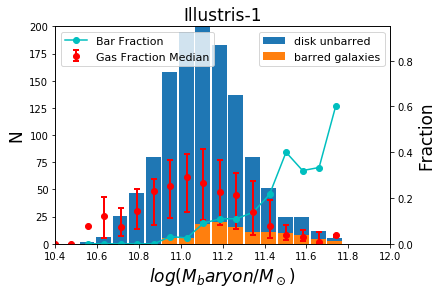

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel(r'$log(M_baryon/M_\odot)$', fontsize=17)
ax1.set_ylabel('N', fontsize=17)
ax1.set_title('Illustris-1', fontsize=17)
ax1.set_xlim(10.4, 12)
ax1.set_ylim(0, 200)
ax2 = ax1.twinx()
ax2.set_ylabel('Fraction', fontsize=17)
ax2.set_ylim(0, 0.95)

bins = np.linspace(10.2, 11.7, 20)
n1, m1 = HistValAndBin(il1_baryonMass[il1_diskID], bins, more=1, mask=1)
n2, m2 = HistValAndBin(il1_baryonMass[il1_barID], bins, more=1, mask=1)
ax1.bar(bins, n1, width=(bins[1] - bins[0]) * 0.9, align='edge', label='disk unbarred')
ax1.bar(bins, n2, width=(bins[1] - bins[0]) * 0.9, align='edge', label='barred galaxies')
ax1.legend(fontsize=11)

#GasFraction ErrorBar
Dgas = il1_gf[il1_diskID]
data = [[], [], []]
mean = []
for i in m1:
    mean.append(np.mean(Dgas[i]))
    d0, d1, d2 = ErrorBarMedian(Dgas[i])
    data[0].append(d0)
    data[1].append(d1)
    data[2].append(d2)
data = np.array(data)
yerr = np.vstack((data[1,:] - data[0,:], data[2,:] - data[1,:]))
x = bins + (bins[1] - bins[0]) / 2
ax2.errorbar(x, data[1,:], yerr=yerr, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='Gas Fraction Median')
ax2.plot(x, n2/n1, color='c', marker='o', label='Bar Fraction')
ax2.legend(loc=2, fontsize=11)
# ax1.tick_params(labelsize=12)
# ax2.tick_params(labelsize=12)
# plt.savefig('/Raid0/zhouzb/local_result/Z=0/Illustris_sMassAndGas.pdf')

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel(r'$log(M_baryon/M_\odot)$', fontsize=17)
ax1.set_ylabel('N', fontsize=17)
ax1.set_title('Illustris-1', fontsize=17)
ax1.set_xlim(10.4, 12)
ax1.set_ylim(0, 200)
ax2 = ax1.twinx()
ax2.set_ylabel('Fraction', fontsize=17)
ax2.set_ylim(0, 0.95)

bins = np.linspace(10.2, 11.7, 20)
n1, m1 = HistValAndBin(il1_baryonMass[il1_diskID], bins, more=1, mask=1)
n2, m2 = HistValAndBin(il1_baryonMass[il1_barID], bins, more=1, mask=1)



ax1.bar(bins, n1, width=(bins[1] - bins[0]) * 0.9, align='edge', label='disk unbarred')
ax1.bar(bins, n2, width=(bins[1] - bins[0]) * 0.9, align='edge', label='barred galaxies')
ax1.legend(fontsize=11)

#GasFraction ErrorBar
Dgas = il1_gf[il1_diskID]
data = [[], [], []]
mean = []
for i in m1:
    mean.append(np.mean(Dgas[i]))
    d0, d1, d2 = ErrorBarMedian(Dgas[i])
    data[0].append(d0)
    data[1].append(d1)
    data[2].append(d2)
data = np.array(data)
yerr = np.vstack((data[1,:] - data[0,:], data[2,:] - data[1,:]))
x = bins + (bins[1] - bins[0]) / 2
ax2.errorbar(x, data[1,:], yerr=yerr, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='Gas Fraction Median')
ax2.plot(x, n2/n1, color='c', marker='o', label='Bar Fraction')
ax2.legend(loc=2, fontsize=11)
# ax1.tick_params(labelsize=12)
# ax2.tick_params(labelsize=12)
# plt.savefig('/Raid0/zhouzb/local_result/Z=0/Illustris_sMassAndGas.pdf')

In [38]:
unbar = []
for i in diskID:
    if i not in barID:
        unbar.append(i)
        
il1_unbar = []
for i in il1_diskID:
    if i not in il1_barID:
        il1_unbar.append(i)

In [52]:
a=np.linspace(10.2, 11.7, 20)

In [53]:
a[1]-a[0]

0.0789473684210531

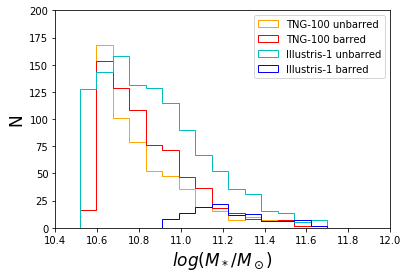

In [42]:
plt.xlabel(r'$log(M_*/M_\odot)$', fontsize=17)
plt.ylabel('N', fontsize=17)
# ax1.set_title('TNG-100', fontsize=17)
plt.ylim(0, 200)
# ax2 = ax1.twinx()
# plt.ylabel('Fraction', fontsize=17)
plt.xlim(10.4, 12)

bins = np.linspace(10.2, 11.7, 20)
n1 = plt.hist(sMass[unbar], bins, histtype='step', color = 'orange', label='TNG-100 unbarred')
n2 = plt.hist(sMass[barID], bins, histtype='step', color = 'red', label='TNG-100 barred ')

n3 = plt.hist(il1_sMass[il1_unbar], bins, histtype='step', color = 'c', label='Illustris-1 unbarred')
n4 = plt.hist(il1_sMass[il1_barID], bins, histtype='step', color = 'blue', label='Illustris-1 barred')
plt.legend()


plt.savefig('/Raid0/zhouzb/result_V2/sMassInbins_Hist.pdf')

/home/zhouzb/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/zhouzb/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/zhouzb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/home/zhouzb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


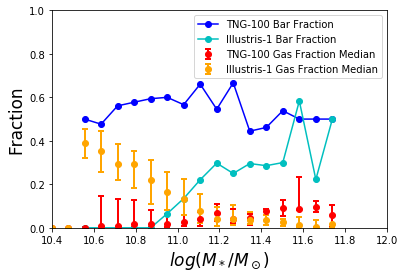

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r'$log(M_*/M_\odot)$', fontsize=17)
ax.set_xlim(10.4, 12)
ax.set_ylabel('Fraction', fontsize=17)
ax.set_ylim(0, 1)

bins = np.linspace(10.2, 11.7, 20)
n1, m1 = HistValAndBin(sMass[diskID], bins, more=1, mask=1)
n2, m2 = HistValAndBin(sMass[barID], bins, more=1, mask=1)
#GasFraction ErrorBar
Dgas = Gf[diskID]
data = [[], [], []]
mean = []
for i in m1:
    mean.append(np.mean(Dgas[i]))
    d0, d1, d2 = ErrorBarMedian(Dgas[i])
    data[0].append(d0)
    data[1].append(d1)
    data[2].append(d2)
data = np.array(data)
yerr = np.vstack((data[1,:] - data[0,:], data[2,:] - data[1,:]))
x = bins + (bins[1] - bins[0]) / 2
ax.errorbar(x, data[1,:], yerr=yerr, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='TNG-100 Gas Fraction Median')
ax.plot(x, n2/n1, color='blue', marker='o', label='TNG-100 Bar Fraction')



n1, m1 = HistValAndBin(il1_sMass[il1_diskID], bins, more=1, mask=1)
n2, m2 = HistValAndBin(il1_sMass[il1_barID], bins, more=1, mask=1)
#GasFraction ErrorBar
Dgas = il1_gf[il1_diskID]
data = [[], [], []]
mean = []
for i in m1:
    mean.append(np.mean(Dgas[i]))
    d0, d1, d2 = ErrorBarMedian(Dgas[i])
    data[0].append(d0)
    data[1].append(d1)
    data[2].append(d2)
data = np.array(data)
yerr = np.vstack((data[1,:] - data[0,:], data[2,:] - data[1,:]))
x = bins + (bins[1] - bins[0]) / 2
ax.errorbar(x, data[1,:], yerr=yerr, elinewidth=2, capthick=2, capsize=3, color='orange', fmt='o', label='Illustris-1 Gas Fraction Median')
ax.plot(x, n2/n1, color='c', marker='o', label='Illustris-1 Bar Fraction')


ax.legend(loc=1)
plt.savefig('/Raid0/zhouzb/result_V2/Gas_Bar_Fraction.pdf')

/home/zhouzb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


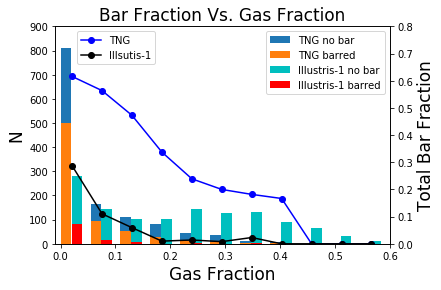

In [4]:
#Fig : 'TNG_Illustris-1_GF_Z=0.png'
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Gas Fraction', fontsize=17)
ax1.set_xlim(-0.01,0.6)
ax1.set_ylabel('N', fontsize=17)
ax1.set_title('Bar Fraction Vs. Gas Fraction', fontsize=17)
ax1.set_ylim(0, 900)
ax2 = ax1.twinx()
ax2.set_ylabel('Total Bar Fraction', fontsize=17)
ax2.set_ylim(0, 0.8)

bins = np.linspace(0, 0.6, 12)
disk_tng_n = HistValAndBin(Gf[diskID], bins)
bar_tng_n = HistValAndBin(Gf[barID], bins)
disk_il1_n = HistValAndBin(il1_gf[il1_diskID], bins)
bar_il1_n = HistValAndBin(il1_gf[il1_barID], bins)
ax1.bar(bins[:-1], disk_tng_n, width=(bins[1] - bins[0]) * 0.35,align = 'edge', label='TNG no bar')
ax1.bar(bins[:-1], bar_tng_n, width=(bins[1] - bins[0]) * 0.35, align='edge', label='TNG barred')
ax1.bar(bins[:-1] + 0.02, disk_il1_n, width=(bins[1] - bins[0]) * 0.35, align = 'edge', label='Illustris-1 no bar', color='c')
ax1.bar(bins[:-1] + 0.02, bar_il1_n, width=(bins[1] - bins[0]) * 0.35, align='edge', label='Illustris-1 barred', color='r')
bar_tng_n[-4] = 1
bar_tng_n[-5] = 2
frac = bar_tng_n / disk_tng_n
frac[-3:] = 0

ax2.plot(bins[:-1] + 0.021, frac, marker='o', label='TNG', color='b')
ax2.plot(bins[:-1] + 0.021, bar_il1_n / disk_il1_n, marker='o', label='Illsutis-1', color='k')

ax1.legend()
ax2.legend(loc=2, bbox_to_anchor=(0.05, 1))
# plt.savefig('/Raid0/zhouzb/local_result/TNG_Illustris-1_GF_Z=0.pdf')

In [15]:
bar_tng_n[-5], disk_tng_n[-5]

(3, 11)

/home/zhouzb/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/zhouzb/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/home/zhouzb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


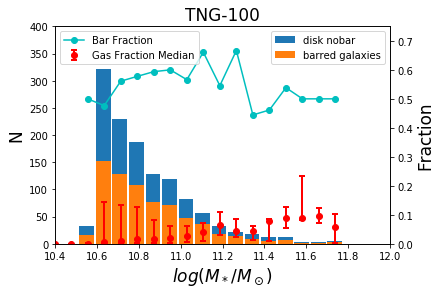

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel(r'$log(M_*/M_\odot)$', fontsize=17)
ax1.set_ylabel('N', fontsize=17)
ax1.set_title('TNG-100', fontsize=17)
ax1.set_xlim(10.4, 12)
ax1.set_ylim(0, 400)
ax2 = ax1.twinx()
ax2.set_ylabel('Fraction', fontsize=17)
ax2.set_ylim(0, 0.75)

bins = np.linspace(10.2, 11.7, 20)
n1, m1 = HistValAndBin(sMass[diskID], bins, more=1, mask=1)
n2, m2 = HistValAndBin(sMass[barID], bins, more=1, mask=1)
ax1.bar(bins, n1, width=(bins[1] - bins[0]) * 0.9, align='edge', label='disk nobar')
ax1.bar(bins, n2, width=(bins[1] - bins[0]) * 0.9, align='edge', label='barred galaxies')
ax1.legend()

#GasFraction ErrorBar
Dgas = Gf[diskID]
data = [[], [], []]
mean = []
for i in m1:
    mean.append(np.mean(Dgas[i]))
    d0, d1, d2 = ErrorBarMedian(Dgas[i])
    data[0].append(d0)
    data[1].append(d1)
    data[2].append(d2)
data = np.array(data)
yerr = np.vstack((data[1,:] - data[0,:], data[2,:] - data[1,:]))
x = bins + (bins[1] - bins[0]) / 2
ax2.errorbar(x, data[1,:], yerr=yerr, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='Gas Fraction Median')
ax2.plot(x, n2/n1, color='c', marker='o', label='Bar Fraction')
ax2.legend(loc=2)
# plt.savefig('/Raid0/zhouzb/local_result/Z=0/TNG_sMassAndGas.pdf')

In [30]:
bins

array([10.2       , 10.27894737, 10.35789474, 10.43684211, 10.51578947,
       10.59473684, 10.67368421, 10.75263158, 10.83157895, 10.91052632,
       10.98947368, 11.06842105, 11.14736842, 11.22631579, 11.30526316,
       11.38421053, 11.46315789, 11.54210526, 11.62105263, 11.7       ])

d:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
d:\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


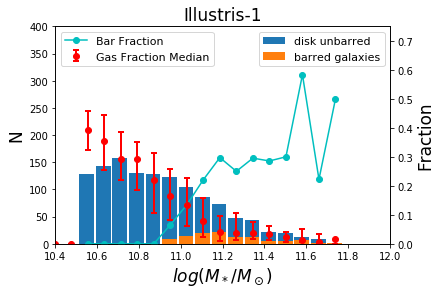

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel(r'$log(M_*/M_\odot)$', fontsize=17)
ax1.set_ylabel('N', fontsize=17)
ax1.set_title('Illustris-1', fontsize=17)
ax1.set_xlim(10.4, 12)
ax1.set_ylim(0, 400)
ax2 = ax1.twinx()
ax2.set_ylabel('Fraction', fontsize=17)
ax2.set_ylim(0, 0.75)

bins = np.linspace(10.2, 11.7, 20)
n1, m1 = HistValAndBin(il1_sMass[il1_diskID], bins, more=1, mask=1)
n2, m2 = HistValAndBin(il1_sMass[il1_barID], bins, more=1, mask=1)
ax1.bar(bins, n1, width=(bins[1] - bins[0]) * 0.9, align='edge', label='disk unbarred')
ax1.bar(bins, n2, width=(bins[1] - bins[0]) * 0.9, align='edge', label='barred galaxies')
ax1.legend(fontsize=11)

#GasFraction ErrorBar
Dgas = il1_gf[il1_diskID]
data = [[], [], []]
mean = []
for i in m1:
    mean.append(np.mean(Dgas[i]))
    d0, d1, d2 = ErrorBarMedian(Dgas[i])
    data[0].append(d0)
    data[1].append(d1)
    data[2].append(d2)
data = np.array(data)
yerr = np.vstack((data[1,:] - data[0,:], data[2,:] - data[1,:]))
x = bins + (bins[1] - bins[0]) / 2
ax2.errorbar(x, data[1,:], yerr=yerr, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='Gas Fraction Median')
ax2.plot(x, n2/n1, color='c', marker='o', label='Bar Fraction')
ax2.legend(loc=2, fontsize=11)
# ax1.tick_params(labelsize=12)
# ax2.tick_params(labelsize=12)
# plt.savefig('/Raid0/zhouzb/local_result/Z=0/Illustris_sMassAndGas.pdf')

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel(r'$log(M_*/M_\odot)$', fontsize=17)
ax1.set_ylabel('N', fontsize=17)
ax1.set_title('TNG100', fontsize=17)
ax1.set_xlim(10.4, 12)
ax1.set_ylim(0, 400)
ax2 = ax1.twinx()
ax2.set_ylabel('Fraction', fontsize=17)
ax2.set_ylim(0, 0.75)

bins = np.linspace(10.2, 11.7, 20)
n1, m1 = HistValAndBin(il1_sMass[il1_diskID], bins, more=1, mask=1)
n2, m2 = HistValAndBin(il1_sMass[il1_barID], bins, more=1, mask=1)
ax1.bar(bins, n1, width=(bins[1] - bins[0]) * 0.9, align='edge', label='disk nobar')
ax1.bar(bins, n2, width=(bins[1] - bins[0]) * 0.9, align='edge', label='barred galaxies')
ax1.legend()

#GasFraction ErrorBar
Dgas = il1_gf[il1_diskID]
data = [[], [], []]
mean = []
for i in m1:
    mean.append(np.mean(Dgas[i]))
    d0, d1, d2 = ErrorBarMedian(Dgas[i])
    data[0].append(d0)
    data[1].append(d1)
    data[2].append(d2)
data = np.array(data)
yerr = np.vstack((data[1,:] - data[0,:], data[2,:] - data[1,:]))
x = bins + (bins[1] - bins[0]) / 2
ax2.errorbar(x, data[1,:], yerr=yerr, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o', label='Gas Fraction Median')
ax2.plot(x, n2/n1, color='c', marker='o', label='Bar Fraction')
ax2.legend(loc=2)
# plt.savefig('/Raid0/zhouzb/local_result/Illustris_sMassAndGas.png', dpi = 300)